In [2]:
# Fetching the MNIST dataset using siket-learn
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [15]:
# Lets see the data
mnist["data"]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Lets see the target 
mnist["target"]

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [3]:
'''
Datasets loaded by Scikit-Learn generally have a similar dictionary structure, includ‐
ing the following:
• A DESCR key describing the dataset
• A data key containing an array with one row per instance and one column per
feature
• A target key containing an array with the labels
'''
# Look at these arrays
X, y = mnist["data"], mnist["target"] #features #labels
print(X.shape, y.shape)

(70000, 784) (70000,)


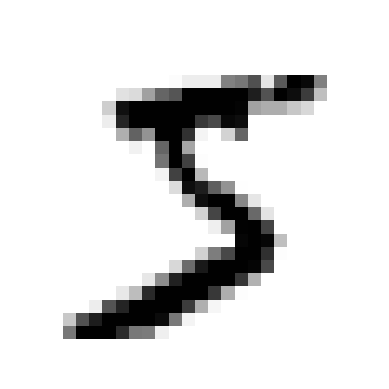

In [32]:
# Their are 70000 images, and each image has 784 features
# This is because each image is 28 × 28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black)
# Let’s take a peek at one digit from the dataset
# All you need to do is grab an instance’s feature vector, reshape it to a 28 × 28 array, and display it using Matplotlib’s imshow() function:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.iloc[0].to_numpy()   # access first row as NumPy array
some_digit_image = some_digit.reshape(28, 28) # square root of 784 -> 28
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()


In [5]:
# Its look like five and yes lable also say its 5:
y[0]

'5'

In [6]:
# And the label is a sting, and most ML Algorithms expects number so lets cast y to integer
import numpy as np

y = y.astype(np.uint8)
y[0]

5

In [37]:
# The MNIST dataset is actually already split into a training set (the first 60,000 images) and a test set (the last 10,000 images):
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# The training set is already shuffled, so we dont have to do it manually
# shuffling ensures that:
# Every batch or fold has a good mix of digits.
# The model learns more effectively.

### Training a Binary Classifier

In [38]:
# For now and only try to identify one digit -> 5
# This “5-detector” will be an example of a binary classifier, capable of distinguishing between just two classes, 5 and not-5
# “Binary” means two possible answers: “Yes” (it’s a 5) and “No” (it’s not a 5)
# Let’s create the target vectors for this classification task:
y_train_5 = (y_train == 5) # True for all 5 and False for non 5
y_test_5 = (y_test == 5)

In [39]:
# Choosing a Classifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

'''
We are using a Stochastic Gradient Descent (SGD) Classifier.
What does “SGD” mean in simple terms?
- It’s an algorithm that learns step by step, improving a little bit after seeing each training example.
- “Stochastic” means random — it picks samples randomly during training instead of going through everything in a fixed order.
- This randomness helps it handle very large datasets efficiently, like MNIST (70,000 images).
- By setting random_state=42, we make sure it behaves the same way every time we run the code (useful for getting consistent results).
'''

'\nWe are using a Stochastic Gradient Descent (SGD) Classifier.\nWhat does “SGD” mean in simple terms?\n- It’s an algorithm that learns step by step, improving a little bit after seeing each training example.\n- “Stochastic” means random — it picks samples randomly during training instead of going through everything in a fixed order.\n- This randomness helps it handle very large datasets efficiently, like MNIST (70,000 images).\n- By setting random_state=42, we make sure it behaves the same way every time we run the code (useful for getting consistent results).\n'

In [40]:
# Training the model
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [41]:
# Lets make a prediction
sgd_clf.predict([some_digit])

C:\Users\krish\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [45]:
# The classifier guesses that this image represents a 5 (True)
# Now lets evalute this model performance
# A good way to evaluate a model is to use cross-validation just like we did in previous chapter
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [49]:
# Wow! above 95% accuracy on all cross validation folds? Looks amazing right?
# Well, before you get too excited, let’s look at a very dumb classifier that just classifies every single image in the “not-5” class:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [51]:
# Lets check the model accuracy now:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])